In [8]:
import jieba
from matplotlib import pyplot as plt
import numpy as np 
import sqlite3
from PIL import Image
from wordcloud import WordCloud

In [9]:
con = sqlite3.connect('D:\C++\data_structure\movie.db')
cur = con.cursor()
sql = "select instroduction from movie250"
data = cur.execute(sql)
text = ""
for item in data:
    text = text + item[0]

cut = jieba.cut(text)
string = ' '.join(cut)


Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\20114\AppData\Local\Temp\jieba.cache
Loading model cost 0.682 seconds.
Prefix dict has been built successfully.


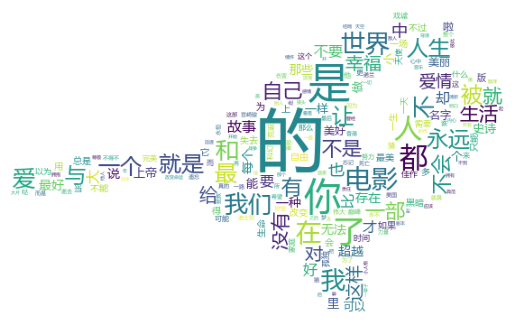

In [18]:
img = Image.open("E:\\Pictures\\Saved Pictures\\houge.jpg")
img_array = np.array(img)
wc = WordCloud(
    background_color='white',
    mask=img_array,
    font_path="msyh.ttc"
)
wc.generate_from_text(string)

fig = plt.figure(1)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file("E:\\Pictures\\Saved Pictures\\houge1.jpg")

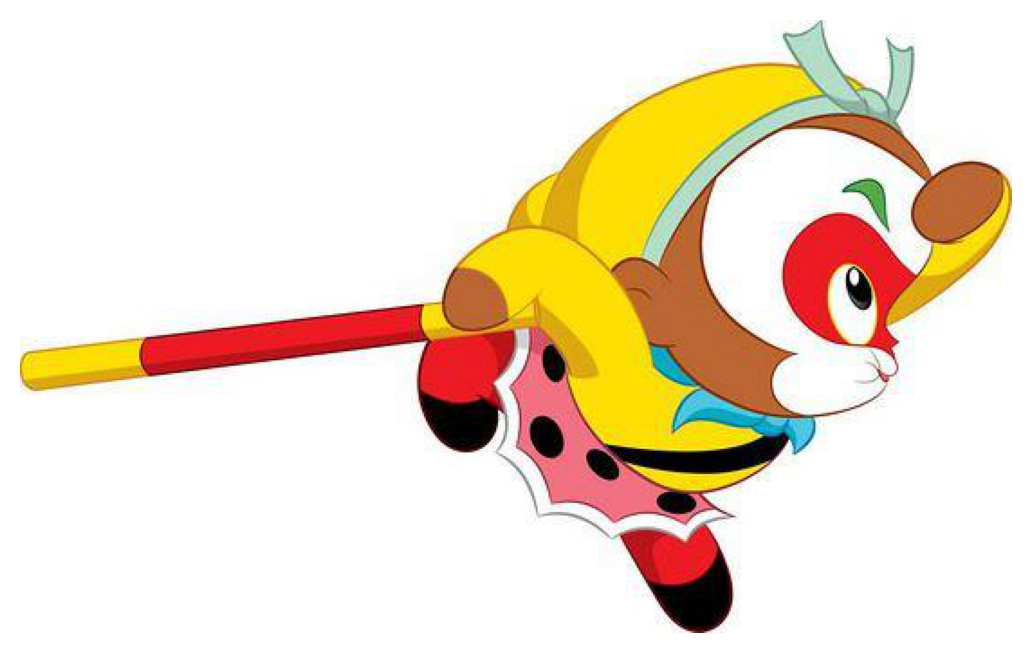

(160, 50, 50, 3)


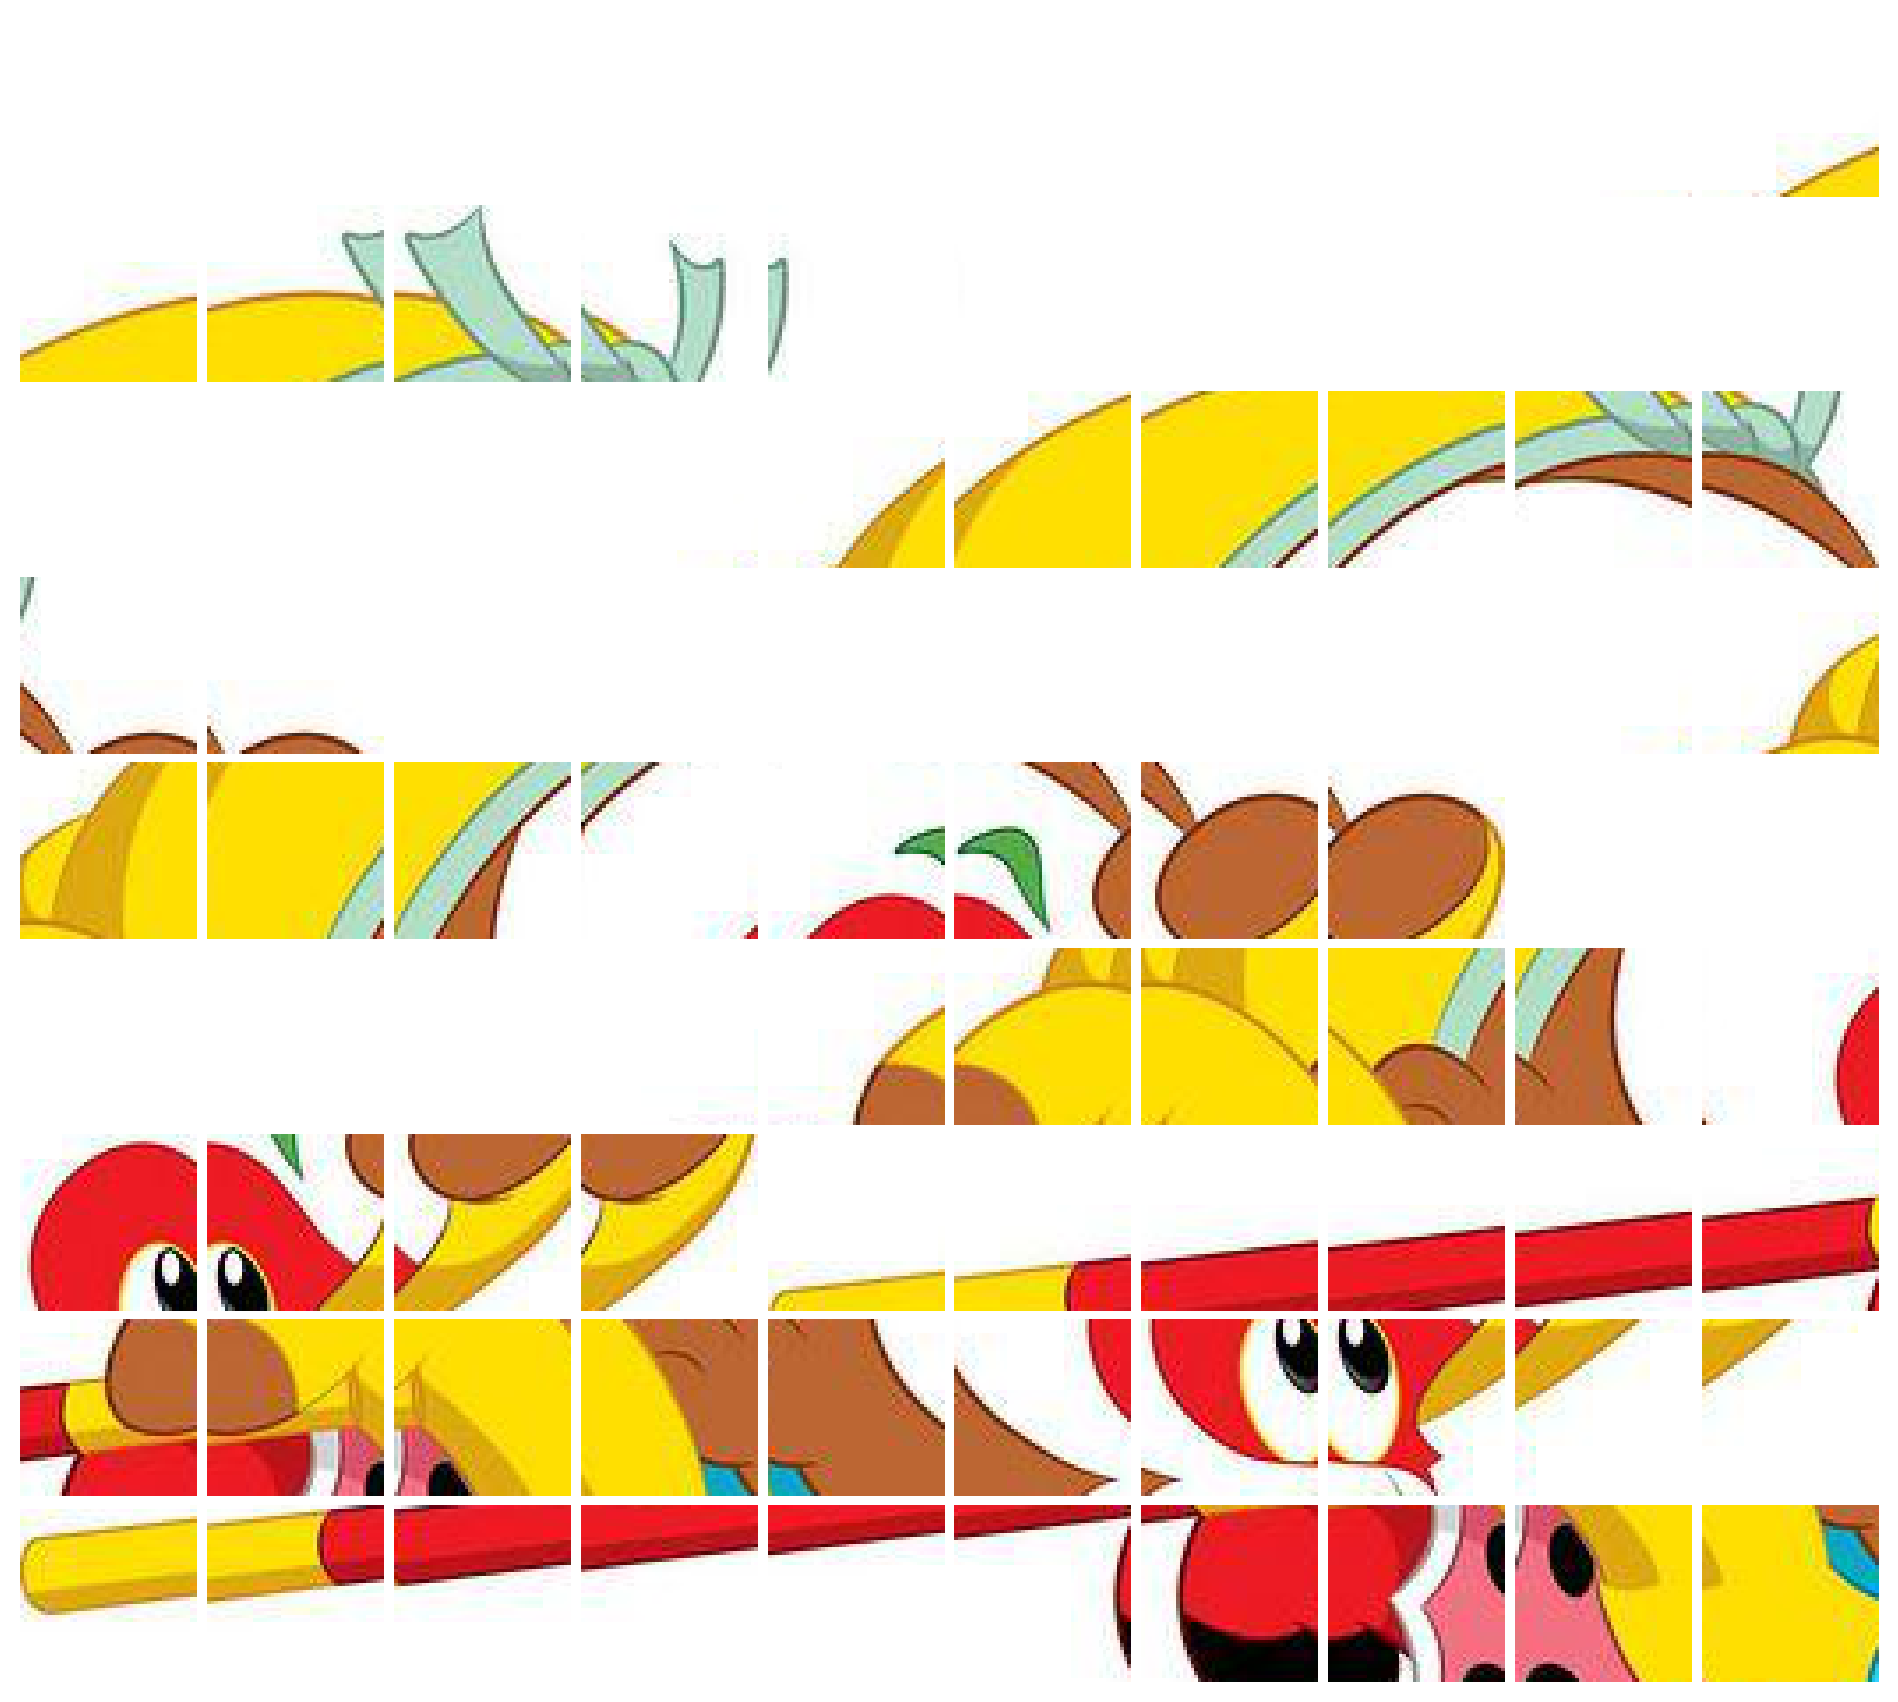

(126, 50, 50, 3)

In [11]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

## 读取一张图像并可视化
im = imread("E:\\Pictures\\Saved Pictures\\houge.jpg") / 255.0
# im = rgb2gray(im)
plt.imshow(im)
plt.axis("off")
plt.show()
im.shape

(321, 481, 3)


## 定义辅助函数    图像转化为图像块
def image2cols(image,patch_size,stride):
    """
    image:需要切分为图像块的图像
    patch_size:图像块的尺寸，如:(10,10)
    stride:切分图像块时移动过得步长，如:5
    """
    import numpy as np
    if len(image.shape) == 2:
        # 灰度图像
        imhigh,imwidth = image.shape
    if len(image.shape) == 3:
        # RGB图像
        imhigh,imwidth,imch = image.shape
    ## 构建图像块的索引
    range_y = np.arange(0,imhigh - patch_size[0],stride)
    range_x = np.arange(0,imwidth - patch_size[1],stride)
    if range_y[-1] != imhigh - patch_size[0]:
        range_y = np.append(range_y,imhigh - patch_size[0])
    if range_x[-1] != imwidth - patch_size[1]:
        range_x = np.append(range_x,imwidth - patch_size[1])
    sz = len(range_y) * len(range_x)  ## 图像块的数量
    if len(image.shape) == 2:   
        ## 初始化灰度图像
        res = np.zeros((sz,patch_size[0],patch_size[1]))
    if len(image.shape) == 3:
        ## 初始化RGB图像
        res = np.zeros((sz,patch_size[0],patch_size[1],imch))
    index = 0
    for y in range_y:
        for x in range_x:
            patch = image[y:y+patch_size[0],x:x+patch_size[1]]
            res[index] = patch
            index = index + 1
    
    return res

## 从图像中获取图像块并可视化
im2col = image2cols(image=im,patch_size=(50,50),stride=35)
print(im2col.shape)
plt.figure(figsize=(12,12))
for ii in np.arange(90):
    plt.subplot(10,10,ii+1)
    plt.imshow(im2col[ii])
    plt.axis("off")
plt.subplots_adjust(wspace = 0.05,hspace = 0.05)  
plt.show()

(126, 50, 50, 3)

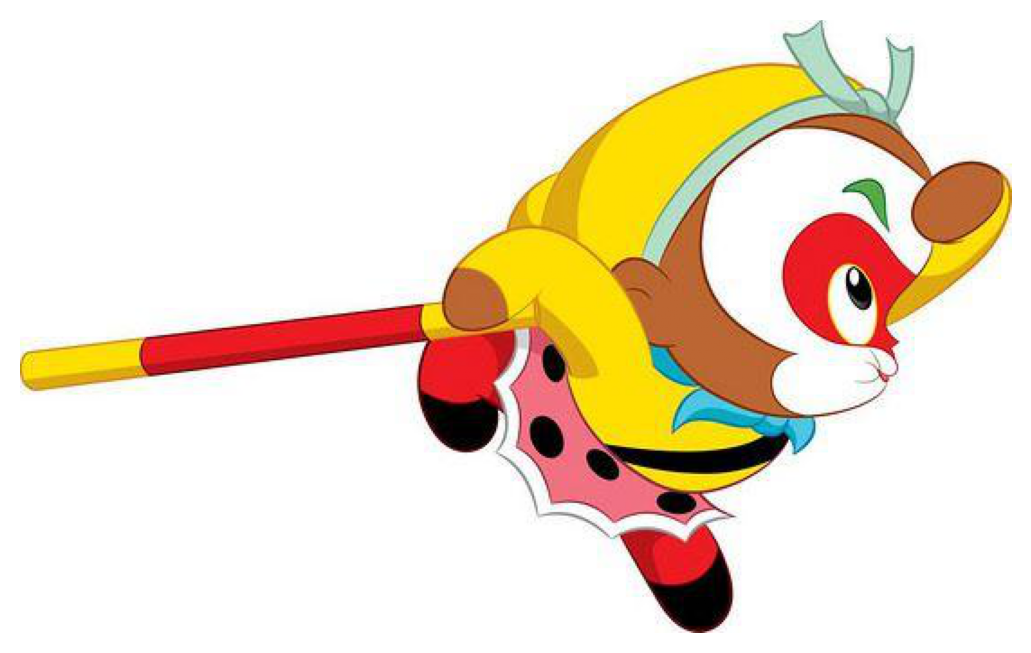

两图像的误差 4.258399188827866e-14


(340, 550, 3)

In [14]:
## 定义函数  图像转化为图像块的逆变换
def col2image(coldata,imsize,stride):
    """
    coldata: 使用image2cols得到的数据
    imsize:原始图像的宽和高，如(321, 481)
    stride:图像切分时的步长，如10
    """
    patch_size = coldata.shape[1:3]
    if len(coldata.shape) == 3:   
        ## 初始化灰度图像
        res = np.zeros((imsize[0],imsize[1]))
        w = np.zeros(((imsize[0],imsize[1])))
    if len(coldata.shape) == 4:   
        ## 初始化RGB图像
        res = np.zeros((imsize[0],imsize[1],3))
        w = np.zeros(((imsize[0],imsize[1],3)))
    range_y = np.arange(0,imsize[0] - patch_size[0],stride)
    range_x = np.arange(0,imsize[1] - patch_size[1],stride)
    if range_y[-1] != imsize[0] - patch_size[0]:
        range_y = np.append(range_y,imsize[0] - patch_size[0])
    if range_x[-1] != imsize[1] - patch_size[1]:
        range_x = np.append(range_x,imsize[1] - patch_size[1])
    index = 0
    for y in range_y:
        for x in range_x:
            res[y:y+patch_size[0],x:x+patch_size[1]] = res[y:y+patch_size[0],x:x+patch_size[1]] + coldata[index]
            w[y:y+patch_size[0],x:x+patch_size[1]] = w[y:y+patch_size[0],x:x+patch_size[1]] + 1
            index = index + 1
    
    return res / w

## 将图像块转化为原图
im2 = col2image(coldata=im2col,imsize=(340,550),stride=35)
plt.imshow(im2)
plt.axis("off")
plt.show()
print("两图像的误差",np.sum(abs(im - im2)))
im.shape


# 两图像的误差 4.64142613232e-14
# (321, 481, 3)